In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据读取、查看

In [2]:
file_path = 'E:/DataSet/tianchi_mobile_recommend_train_user.csv'
raw_data = pd.read_csv(file_path, dtype=str)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802757 entries, 0 to 802756
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        802757 non-null  object
 1   item_id        802757 non-null  object
 2   behavior_type  802757 non-null  object
 3   user_geohash   252627 non-null  object
 4   item_category  802757 non-null  object
 5   time           802756 non-null  object
dtypes: object(6)
memory usage: 36.7+ MB


In [4]:
raw_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


# 数据预处理

In [5]:
# 缺失率
raw_data.apply(lambda x: sum(x.isnull()) / len(x))

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.685301
item_category    0.000000
time             0.000001
dtype: float64

In [6]:
raw_data.shape

(802757, 6)

In [7]:
raw_data.apply(lambda x: sum(x.isnull()))

user_id               0
item_id               0
behavior_type         0
user_geohash     550130
item_category         0
time                  1
dtype: int64

In [8]:
raw_data['date'] = raw_data['time'].str[0:10]
raw_data['hour'] = raw_data['time'].str[11:]

In [9]:
raw_data.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [10]:
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['time'] = pd.to_datetime(raw_data['time'])
raw_data['hour'] = raw_data['hour'].astype(float)

In [11]:
raw_data.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                    float64
dtype: object

In [12]:
raw_data.sort_values(by='time', ascending=True, inplace=True)
# 原索引删除，重置为0
raw_data.reset_index(drop=True, inplace=True)

In [13]:
raw_data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,130270245,253791580,2,NaN,9261,2014-11-18,2014-11-18,0.0
1,71146691,373475577,1,NaN,4370,2014-11-18,2014-11-18,0.0
2,71146691,212152444,1,NaN,1863,2014-11-18,2014-11-18,0.0
3,88271974,25265374,1,NaN,1488,2014-11-18,2014-11-18,0.0
4,106634442,44026159,1,NaN,11955,2014-11-18,2014-11-18,0.0


In [14]:
raw_data.describe(include=['object'])

,user_id,item_id,behavior_type,user_geohash,item_category
count,802757,802757,802757,252627,802757
unique,6471,554442,4,132483,6754
top,36233277,97655171,1,94ek6lw,1863
freq,3117,108,756387,101,26360


In [15]:
raw_data.describe(include='all')

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,802757,802757,802757,252627,802757,802756,802756,802756.000000
unique,6471,554442,4,132483,6754,NaN,NaN,NaN
top,36233277,97655171,1,94ek6lw,1863,NaN,NaN,NaN
freq,3117,108,756387,101,26360,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2014-12-04 04:56:08.951462656,2014-12-03 14:09:09.518906624,14.783176
min,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2014-11-26 15:00:00,2014-11-26 00:00:00,10.000000
50%,NaN,NaN,NaN,NaN,NaN,2014-12-04 15:00:00,2014-12-04 00:00:00,16.000000
75%,NaN,NaN,NaN,NaN,NaN,2014-12-12 00:00:00,2014-12-12 00:00:00,20.000000
max,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,23.000000


# 构建模型
用户pv、uv、arpu、arppu、付费率

In [22]:
# 每日pv
pv_daily = raw_data.groupby('date').count()['user_id']
# pv_daily.rename('pv_user_id',inplace=True)
pv_daily.head()
pv_daily

date
2014-11-18    23943
2014-11-19    23250
2014-11-20    23372
2014-11-21    21888
2014-11-22    23832
2014-11-23    24817
2014-11-24    24705
2014-11-25    23847
2014-11-26    23161
2014-11-27    24049
2014-11-28    22642
2014-11-29    24169
2014-11-30    27070
2014-12-01    25946
2014-12-02    26324
2014-12-03    26658
2014-12-04    26105
2014-12-05    24300
2014-12-06    25622
2014-12-07    26516
2014-12-08    24751
2014-12-09    25636
2014-12-10    27382
2014-12-11    32051
2014-12-12    45197
2014-12-13    26925
2014-12-14    26677
2014-12-15    26832
2014-12-16    25994
2014-12-17    25396
2014-12-18    23699
Name: user_id, dtype: int64

In [24]:
# 每日uv
uv_daily = raw_data.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())
# uv_daily.rename('uv_user_id',inplace=True)
uv_daily

date
2014-11-18    3286
2014-11-19    3268
2014-11-20    3296
2014-11-21    3202
2014-11-22    3157
2014-11-23    3273
2014-11-24    3358
2014-11-25    3286
2014-11-26    3266
2014-11-27    3263
2014-11-28    3145
2014-11-29    3234
2014-11-30    3407
2014-12-01    3406
2014-12-02    3423
2014-12-03    3487
2014-12-04    3420
2014-12-05    3304
2014-12-06    3368
2014-12-07    3405
2014-12-08    3434
2014-12-09    3414
2014-12-10    3510
2014-12-11    3768
2014-12-12    4366
2014-12-13    3517
2014-12-14    3475
2014-12-15    3556
2014-12-16    3515
2014-12-17    3459
2014-12-18    3373
Name: user_id, dtype: int64

In [18]:
pv_uv_daily = pd.concat([pv_daily,uv_daily],axis=1)
pv_uv_daily.head()

,pv_user_id,uv_user_id
date,,
2014-11-18,23943,3286
2014-11-19,23250,3268
2014-11-20,23372,3296
2014-11-21,21888,3202
2014-11-22,23832,3157


In [19]:
pv_uv_daily.rename(columns={'pv_user_id':'pv','uv_user_id':'uv'},inplace =True)
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,23943,3286
2014-11-19,23250,3268
2014-11-20,23372,3296
2014-11-21,21888,3202
2014-11-22,23832,3157


In [25]:
# 相关系数cov
pv_uv_daily.corr(method='pearson')
# pv uv 呈正相关趋势

,pv,uv
pv,1.000000,0.964318
uv,0.964318,1.000000


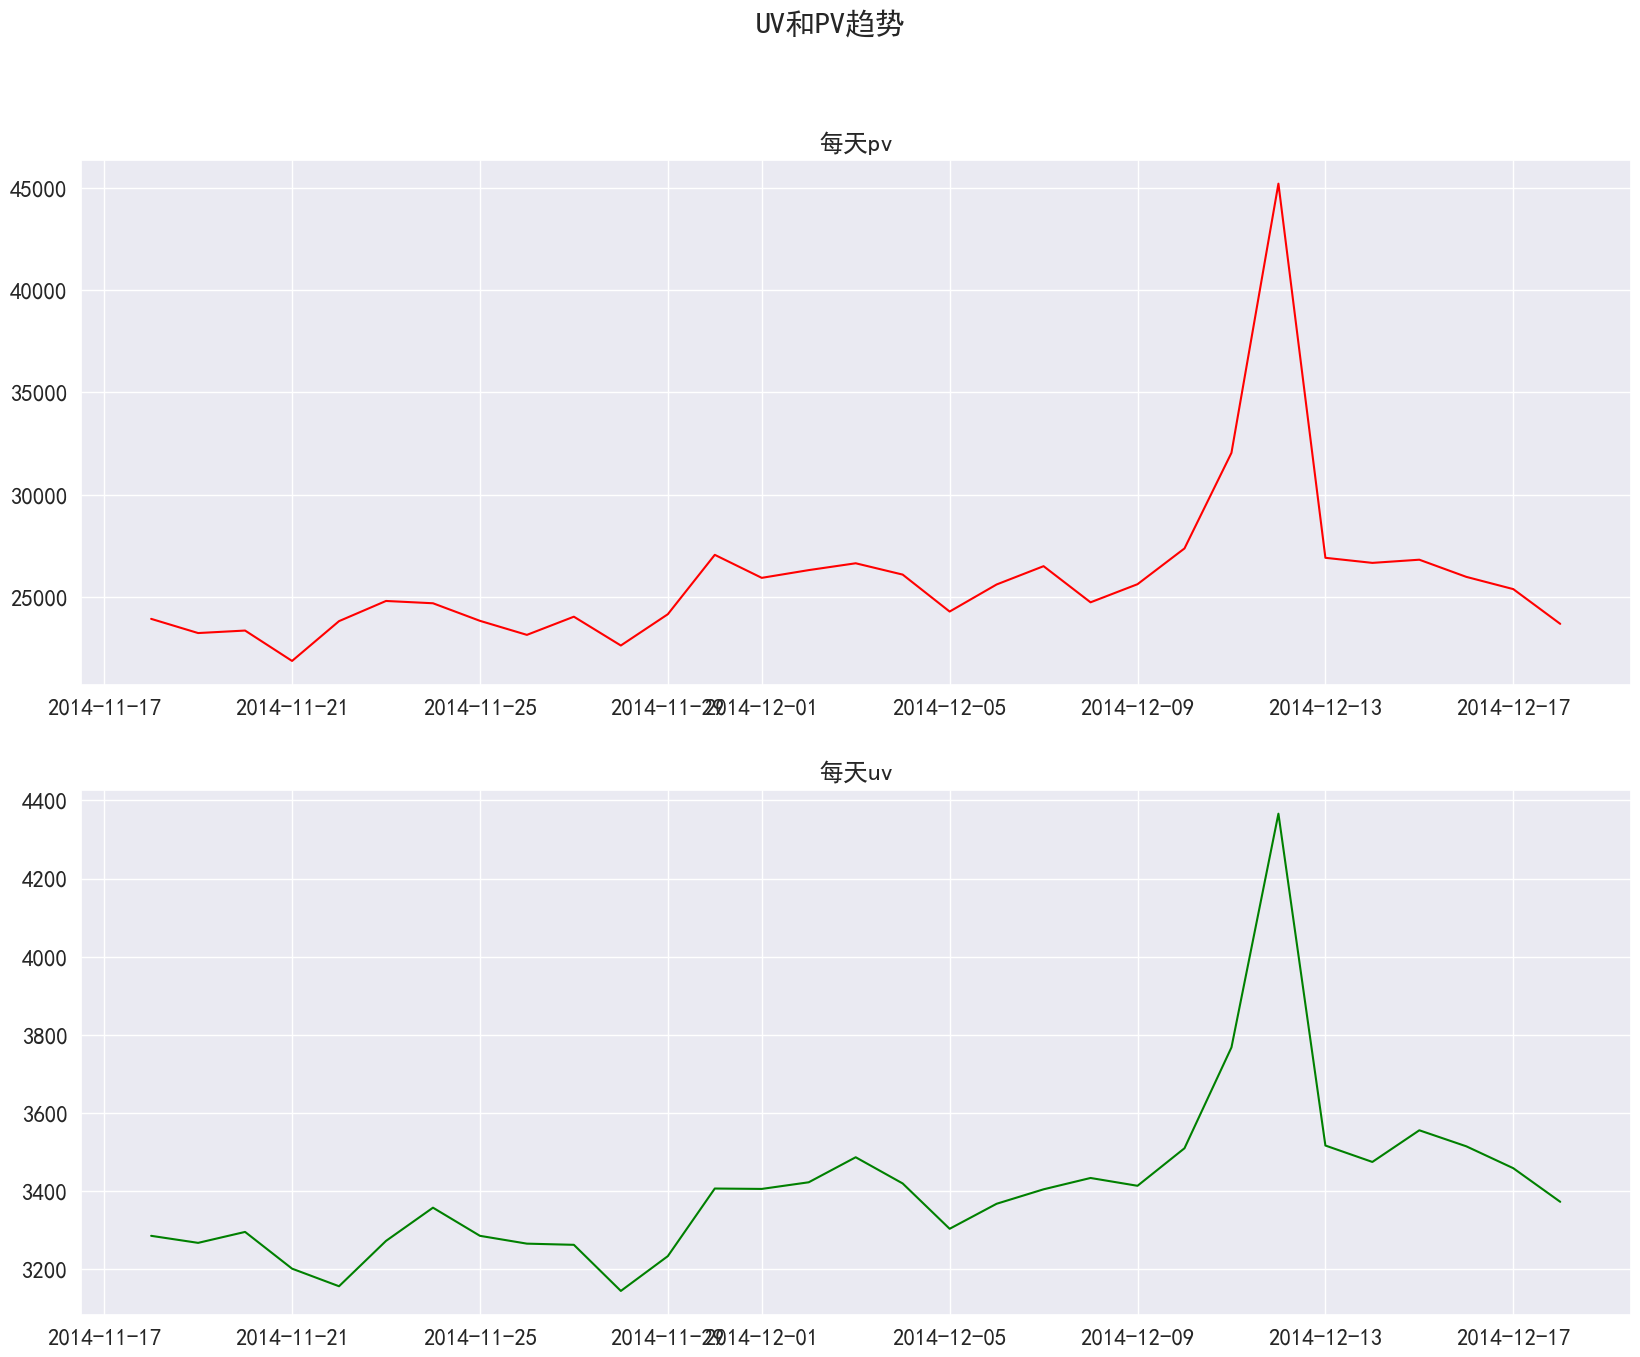

In [38]:
plt.figure(figsize=(20,15))
# subplot 三个参数分别为宽、高、图位置
plt.subplot(211)
plt.plot(pv_daily,color='red')
plt.title('每天pv')
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天uv')
plt.suptitle('UV和PV趋势')
plt.show()

In [39]:
pv_daily_hour = raw_data.groupby('hour').count()['user_id']
pv_daily_hour.head()

hour
0.0    35088
1.0    18433
2.0    10035
3.0     6552
4.0     5006
Name: user_id, dtype: int64

In [41]:
uv_daily_hour = raw_data.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())
uv_daily_hour.head()

hour
0.0    3095
1.0    1937
2.0    1254
3.0     947
4.0     843
Name: user_id, dtype: int64

In [42]:
pv_uv_daily_hour = pd.concat((pv_daily_hour,uv_daily_hour),axis=1)
pv_uv_daily_hour.columns=['pv','uv']
pv_uv_daily_hour.head()

,pv,uv
hour,,
0.0,35088,3095
1.0,18433,1937
2.0,10035,1254
3.0,6552,947
4.0,5006,843


In [43]:
pv_uv_daily_hour.corr(method='spearman')

,pv,uv
pv,1.000000,0.908458
uv,0.908458,1.000000


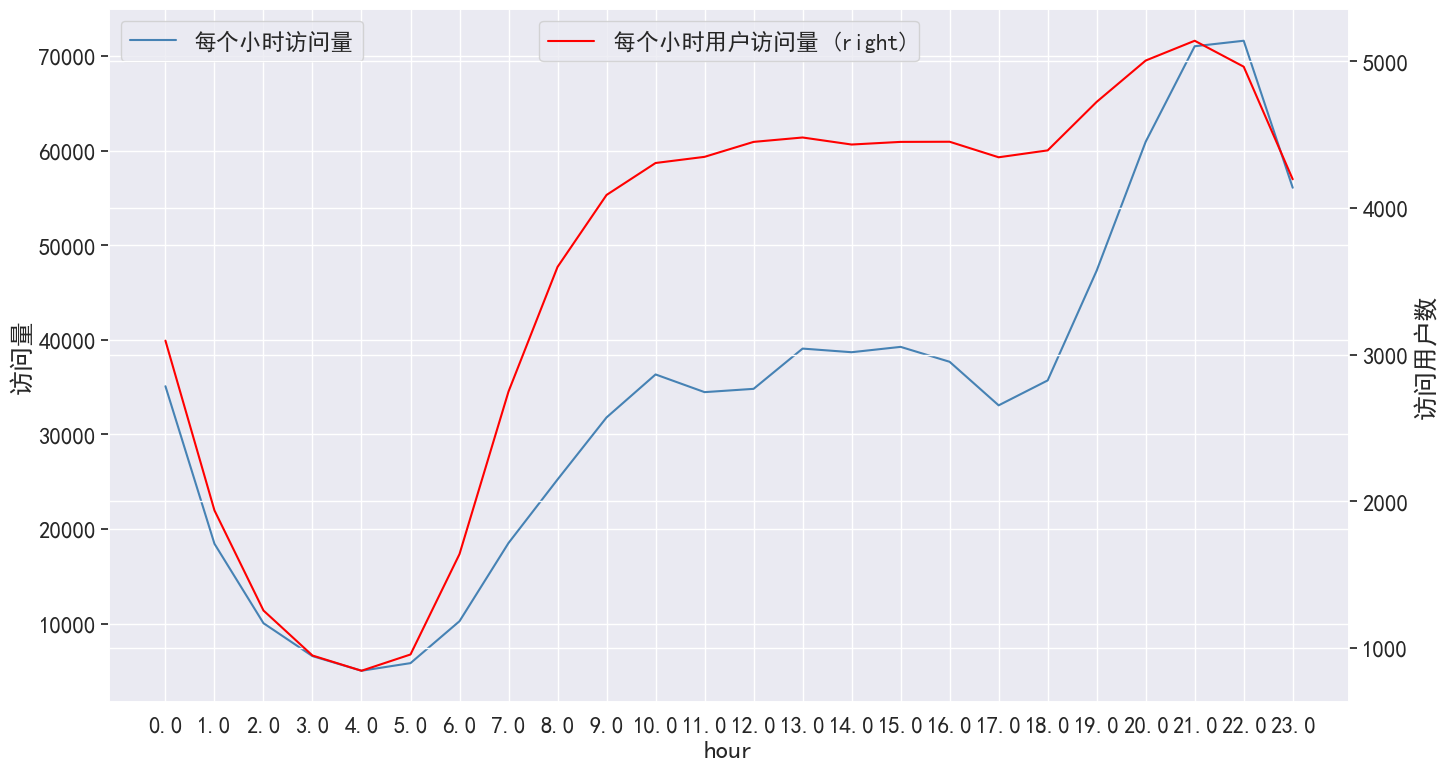

In [44]:
plt.figure(figsize=(16,9))
pv_uv_daily_hour['pv'].plot(color='steelblue',label='每个小时访问量')
plt.legend(loc='upper center')
plt.ylabel('访问量')
pv_uv_daily_hour['uv'].plot(color='red',label='每个小时用户访问量',secondary_y=True)
plt.ylabel('访问用户数')
plt.xticks(range(0,24),pv_uv_daily_hour.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()

In [47]:
# 透视表
# 点击、收藏、加购物车、支付
# 每小时用户不同表现的用户数
pv_detail = pd.pivot_table(columns ='behavior_type',index ='hour' , data = raw_data,values = 'user_id',aggfunc=np.size)
pv_detail

behavior_type,1,2,3,4
hour,,,,
0.0,33078,747,917,346
1.0,17436,447,424,126
2.0,9511,224,242,58
3.0,6238,125,158,31
4.0,4733,126,123,24
5.0,5498,140,149,25
6.0,9699,235,260,52
7.0,17581,370,458,105
8.0,23797,487,697,247


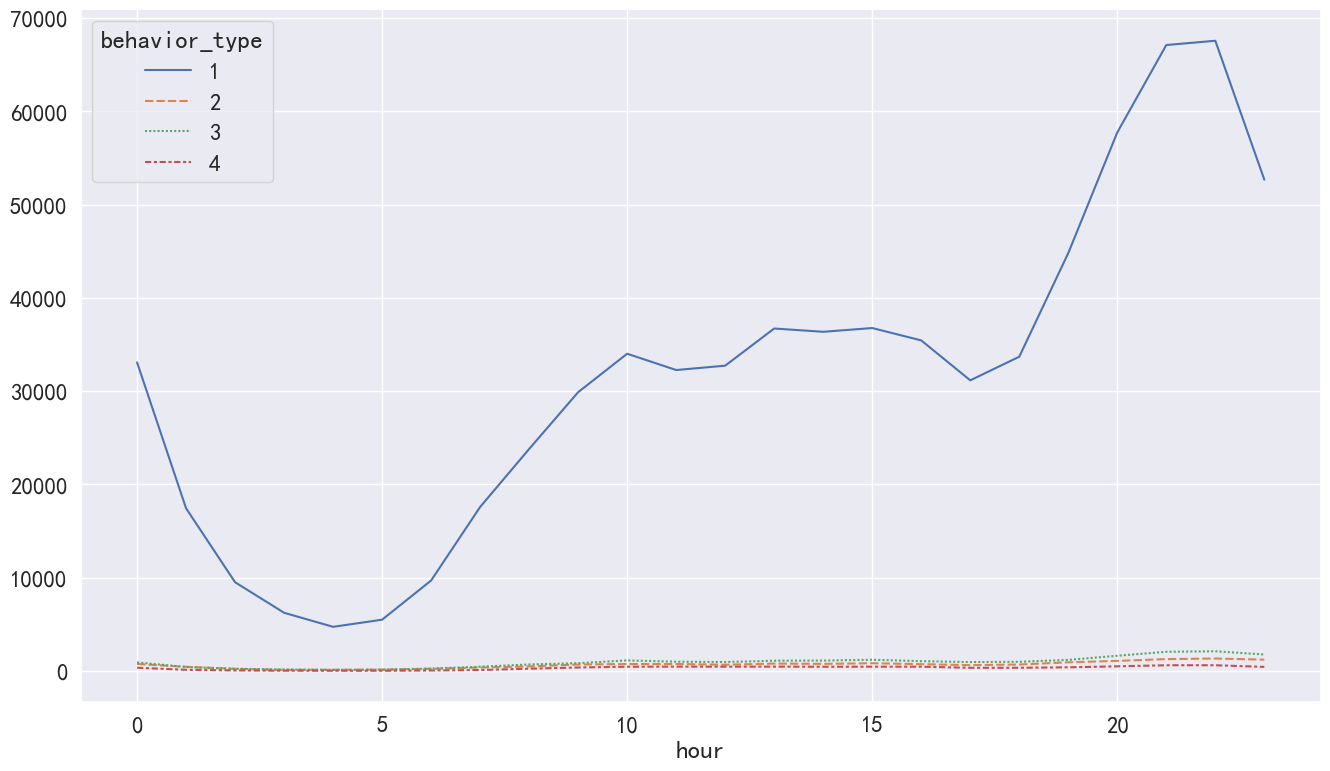

In [48]:
plt.figure(figsize=(16,9))
sns.lineplot(data=pv_detail)
plt.show()

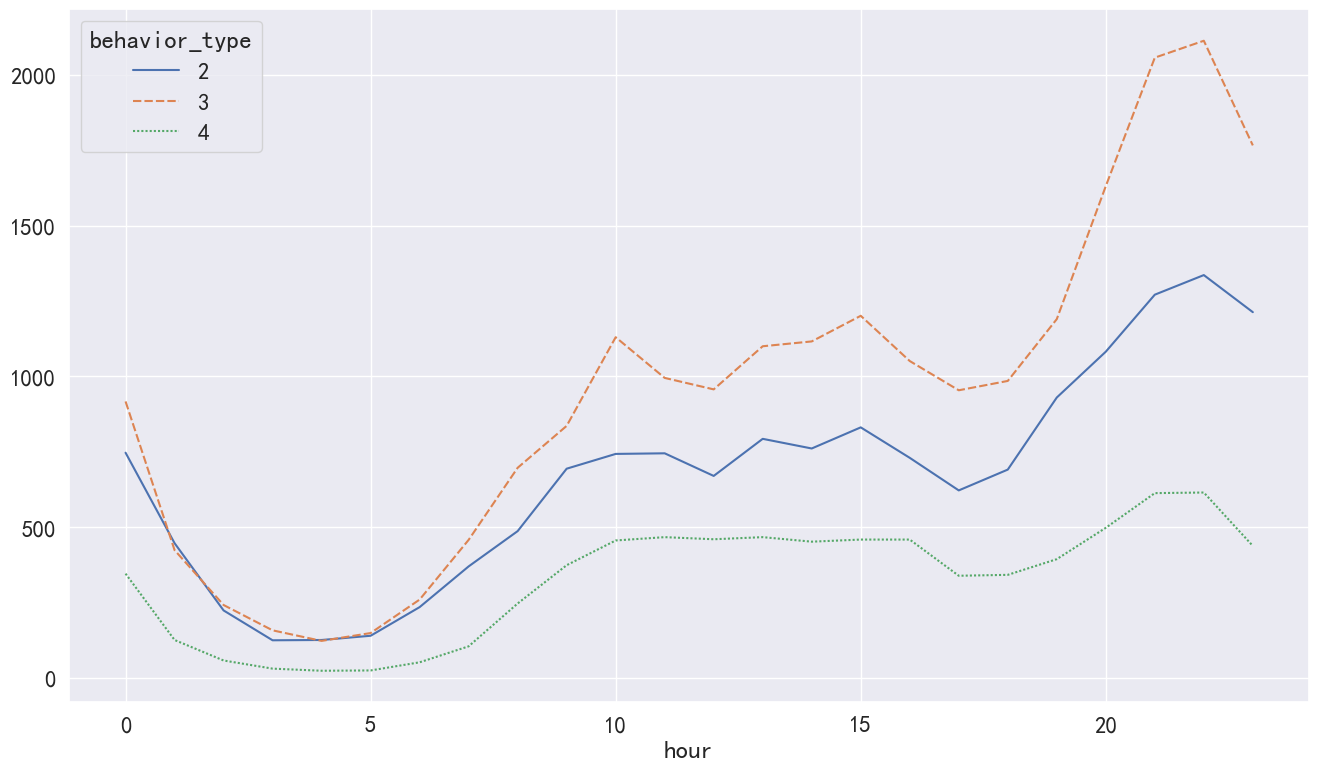

In [50]:
plt.figure(figsize=(16,9))
# 上述第一种行为数据过大，影响其他数据可视化效果，单独查看另外三种表现行为
sns.lineplot(data = pv_detail.iloc[:,1:])
plt.show()

In [51]:
# 行为4为用户支付行为
# 查看每个用户的支付次数
data_user_buy = raw_data[raw_data.behavior_type=='4'].groupby('user_id').size()
data_user_buy

user_id
100012968    2
100024529    2
100027681    4
100035725    1
100067745    2
            ..
99796192     1
99796276     3
99851929     1
99900937     2
99989881     1
Length: 3326, dtype: int64

In [52]:
data_user_buy.describe()

count    3326.000000
mean        2.359290
std         2.614917
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        82.000000
dtype: float64

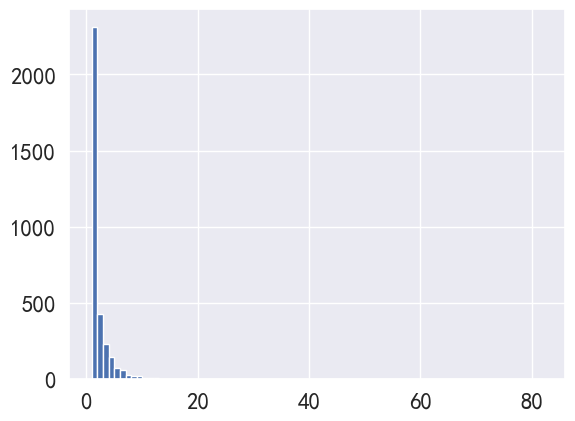

0.9981960312687913

In [58]:
plt.hist(x=data_user_buy,bins=80)
plt.show()
data_user_buy[data_user_buy<20].size/data_user_buy.size

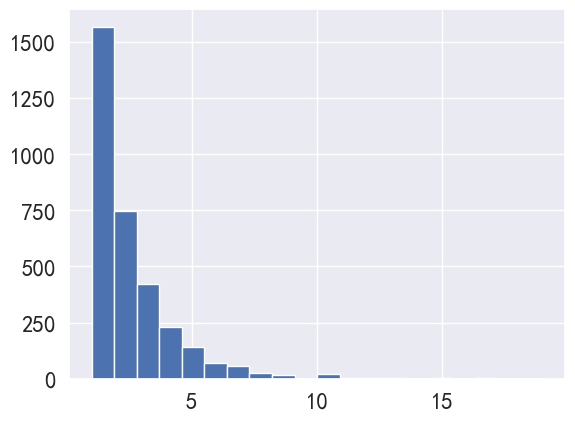

In [60]:
# 少量数据影响图表效果，需要排除
plt.hist(x=data_user_buy[data_user_buy<20],bins=20)
plt.show()

In [65]:
# ARPU/ARPPU计算
# ARPU，总销售额/用户数
# ARPPU,总销售额/支付的用户数
data_user_buy1 = raw_data[raw_data.behavior_type=='4'].groupby(['date','user_id'])
data_user_buy1.count()

item_id  behavior_type  user_geohash  item_category   
date       user_id                                                          
2014-11-18 100024529        1              1             0              1  \
           100128093        1              1             0              1   
           101538639        4              4             0              4   
           102014015        1              1             0              1   
           103962421        1              1             0              1   
...                       ...            ...           ...            ...   
2014-12-18 98607707         1              1             0              1   
           99418963         1              1             1              1   
           99674599         1              1             1              1   
           99785045         1              1             0              1   
           99796276         2              2             2              2   

                      time  hour  
date       user_id                
2014-11-18 100024529     1     1  
           100128093     1     1  
           101538639     4     4  
           102014015     1     1  
           103962421     1     1  
...                    ...   ...  
2014-12-18 98607707      1     1  
           99418963      1     1  
           99674599      1     1  
           99785045      1     1  
           99796276      2     2  

[6381 rows x 6 columns]

In [67]:
# 每天每个用户的支付次数
d_b_1 = data_user_buy1.count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})

In [69]:
data_user_buy_ARPPU = d_b_1.groupby('date').sum()['total']/d_b_1.groupby('date').count()['total']
data_user_buy_ARPPU

date
2014-11-18    1.232432
2014-11-19    1.241206
2014-11-20    1.262857
2014-11-21    1.192308
2014-11-22    1.314286
2014-11-23    1.247191
2014-11-24    1.209677
2014-11-25    1.244565
2014-11-26    1.263804
2014-11-27    1.207071
2014-11-28    1.241573
2014-11-29    1.236364
2014-11-30    1.133005
2014-12-01    1.220183
2014-12-02    1.170984
2014-12-03    1.277512
2014-12-04    1.205742
2014-12-05    1.189189
2014-12-06    1.208333
2014-12-07    1.165829
2014-12-08    1.200000
2014-12-09    1.167568
2014-12-10    1.150000
2014-12-11    1.191860
2014-12-12    1.400000
2014-12-13    1.188482
2014-12-14    1.169154
2014-12-15    1.151899
2014-12-16    1.195238
2014-12-17    1.194737
2014-12-18    1.200000
Name: total, dtype: float64

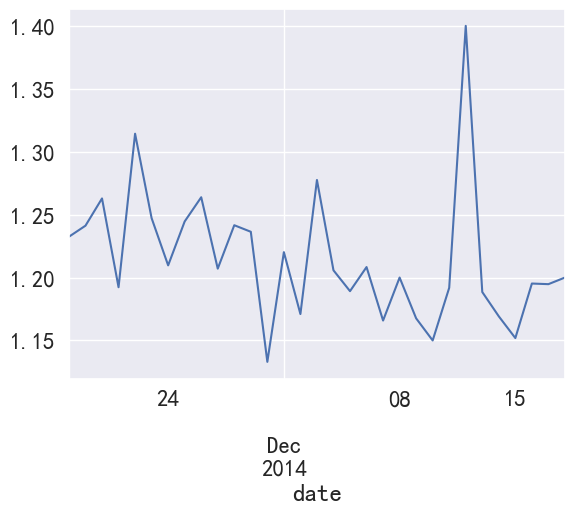

In [70]:
data_user_buy_ARPPU.plot()
plt.show()

In [73]:
data_user_buy_ARPPU.describe()

count    31.000000
mean      1.215260
std       0.053003
min       1.133005
25%       1.188835
50%       1.205742
75%       1.241390
max       1.400000
Name: total, dtype: float64

In [77]:
raw_data['operation'] = 1
d_t_2   = raw_data.groupby(['date','user_id','behavior_type'])['operation'].count()

In [75]:
d_t_2

date        user_id    behavior_type
2014-11-18  100024529  1                27
                       3                 1
                       4                 1
            100027681  1                 8
            10004287   1                21
                                        ..
2014-12-18  99796276   1                 6
                       3                 1
                       4                 2
            9996155    1                 8
            99989881   1                 1
Name: operation, Length: 135523, dtype: int64

In [79]:
d_t_2_ = d_t_2.reset_index().rename(columns={'operation':'total'})

In [81]:
a = d_t_2_.groupby('date').apply(lambda x:x[x.behavior_type=='4'].total.sum()/len(x.user_id.unique())) # 实际活跃用户的支付次数
a

date
2014-11-18    0.069385
2014-11-19    0.075581
2014-11-20    0.067051
2014-11-21    0.058089
2014-11-22    0.072854
2014-11-23    0.067828
2014-11-24    0.067004
2014-11-25    0.069690
2014-11-26    0.063074
2014-11-27    0.073245
2014-11-28    0.070270
2014-11-29    0.063080
2014-11-30    0.067508
2014-12-01    0.078097
2014-12-02    0.066024
2014-12-03    0.076570
2014-12-04    0.073684
2014-12-05    0.066586
2014-12-06    0.068884
2014-12-07    0.068135
2014-12-08    0.057659
2014-12-09    0.063269
2014-12-10    0.058974
2014-12-11    0.054406
2014-12-12    0.232478
2014-12-13    0.064544
2014-12-14    0.067626
2014-12-15    0.076772
2014-12-16    0.071408
2014-12-17    0.065626
2014-12-18    0.062259
dtype: float64

<Axes: xlabel='date'>

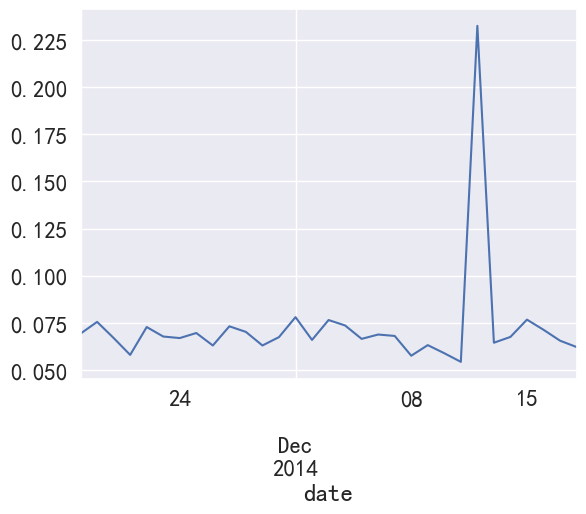

In [82]:
a.plot()

In [83]:
d_t_3 = raw_data[raw_data['behavior_type'] == '4'].groupby(['user_id','date','hour'])['operation'].sum()
d_t_3

user_id    date        hour
100012968  2014-11-22  0.0     1
           2014-11-25  21.0    1
100024529  2014-11-18  8.0     1
           2014-11-19  1.0     1
100027681  2014-11-22  10.0    3
                              ..
99796276   2014-12-18  19.0    2
99851929   2014-11-29  19.0    1
99900937   2014-12-06  14.0    1
           2014-12-17  14.0    1
99989881   2014-12-04  22.0    1
Name: operation, Length: 6855, dtype: int64

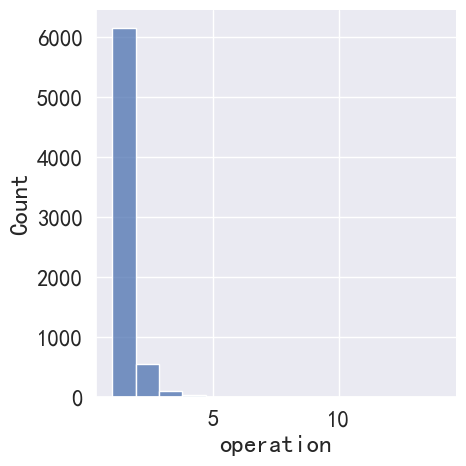

In [84]:
sns.displot(d_t_3)

# 复购行为

In [93]:
data_rebuy = raw_data[raw_data.behavior_type =='4' ].groupby('user_id')['date'].apply(lambda x: len(x. unique()))
data_rebuy

user_id
100012968    2
100024529    2
100027681    2
100035725    1
100067745    2
            ..
99796192     1
99796276     2
99851929     1
99900937     2
99989881     1
Name: date, Length: 3326, dtype: int64

In [94]:
data_rebuy.describe()

count    3326.000000
mean        1.918521
std         1.437303
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: date, dtype: float64

In [95]:
data_rebuy[data_rebuy>=2].count()/data_rebuy.count() # 复购率

0.46692723992784124

In [96]:
date_buy_slip = raw_data[raw_data.behavior_type=='4'].groupby('user_id').date.apply(lambda x:x.sort_values()) # 每个用户购买的日期
date_buy_slip

user_id          
100012968  92807    2014-11-22
           184160   2014-11-25
100024529  3485     2014-11-18
           25112    2014-11-19
100027681  98244    2014-11-22
                       ...    
99796276   794012   2014-12-18
99851929   275870   2014-11-29
99900937   450696   2014-12-06
           763495   2014-12-17
99989881   412930   2014-12-04
Name: date, Length: 7847, dtype: datetime64[ns]

In [99]:
date_buy_slip_ = raw_data[raw_data.behavior_type=='4'].groupby('user_id').date.apply(lambda x:x.sort_values()).diff(1).dropna()
date_buy_slip_

user_id          
100012968  184160     3 days
100024529  3485      -7 days
           25112      1 days
100027681  98244      3 days
           98334      0 days
                      ...   
99796276   794012     0 days
99851929   275870   -19 days
99900937   450696     7 days
           763495    11 days
99989881   412930   -13 days
Name: date, Length: 7846, dtype: timedelta64[ns]

In [100]:
date_buy_slip_.map(lambda x:x.days)

user_id          
100012968  184160     3
100024529  3485      -7
           25112      1
100027681  98244      3
           98334      0
                     ..
99796276   794012     0
99851929   275870   -19
99900937   450696     7
           763495    11
99989881   412930   -13
Name: date, Length: 7846, dtype: int64

In [101]:
# 漏斗分析
data_day_buy4 = data_user_buy
data_user_count = raw_data.groupby('behavior_type').size()
data_user_count  #四种行为的数量  点击、收藏、加入购物车和支付
pv_all = raw_data['user_id'].count()
pv_all
(pv_all - data_user_count[0]) / pv_all  #总浏览量中有多少人没有点击就离开了，这个就是流失率
(data_user_count[0] - data_user_count[2]) / data_user_count[0]  #有多少人点击了但是没有加入购物车

(data_user_count[2] - data_user_count[1]) / data_user_count[2]  #并不是所有加入购物车的人都进行了收藏，有29%的人并没有收藏
(data_user_count[1] - data_user_count[3]) / data_user_count[1]  #收藏的人有50%进行了支付
from datetime import datetime

recent_buy_time = raw_data[raw_data['behavior_type'] == '4'].groupby('user_id')['date'].apply(
    lambda x: datetime(2014, 12, 20) - x.sort_values().iloc[-1])

#每个用户最新的购买日期和参考日期之间的时间间隔
recent_buy_time = recent_buy_time.reset_index().rename(columns={'date': 'recent'})
recent_buy_time
recent_buy_time.recent = recent_buy_time.recent.apply(lambda x: x.days)  #去掉days

recent_buy_time

buy_freq = raw_data[raw_data['behavior_type'] == '4'].groupby('user_id').date.count()

buy_freq = buy_freq.reset_index().rename(columns={'date': 'freq'})
rfm = pd.merge(recent_buy_time, buy_freq, left_on='user_id', right_on='user_id')

rfm
rfm['recent_value'] = pd.qcut(rfm.recent, 2, labels=['2', '1'])
rfm['freq_value'] = pd.qcut(rfm.recent, 2, labels=['1', '2'])
rfm['rfm'] = rfm['recent_value'].str.cat(rfm['freq_value'])

rfm  #11是最佳

,user_id,recent,freq,recent_value,freq_value,rfm
0,100012968,25,2,1,2,12
1,100024529,31,2,1,2,12
2,100027681,22,4,1,2,12
3,100035725,21,1,1,2,12
4,100067745,16,2,1,2,12
...,...,...,...,...,...,...
3321,99796192,28,1,1,2,12
3322,99796276,2,3,2,1,21
3323,99851929,21,1,1,2,12
3324,99900937,3,2,2,1,21
